In [9]:
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from colorthief import ColorThief
import colorsys
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time 
import urllib.request 
import os


def crawling(search, count = 30):
    # 이미지가 저장될 경로
    # 크롤링 30개 기준 40초
    saveurl = "C:/Temp/google img/dataset/"

    ## 셀레니움으로 구글 이미지 접속 후 이미지 검색

    options = webdriver.ChromeOptions()
    options.headless = True
    options.add_argument("window-size=1920x1080")

    driver = webdriver.Chrome(options=options)
    driver.get("https://www.google.co.kr/imghp?hl=ko&tab=wi&ogbl") 
    elem = driver.find_element("name","q") 
    elem.send_keys(search)

    elem.send_keys(Keys.RETURN) 

    #이미지 찾고 다운받기
    images = driver.find_elements(By.CSS_SELECTOR,".rg_i.Q4LuWd")

    for i in range(count):

        try: 
            images[i].click() # 이미지 클릭
            time.sleep(1)

            imgUrl = driver.find_element(By.CSS_SELECTOR,".n3VNCb").get_attribute("src")
            urllib.request.urlretrieve(imgUrl, saveurl + str(i) + ".jpg")    # 이미지 다운

        except:
            pass
    driver.close()


# folder path -> 폴더 안에 있는 이미지를 하나로 합침
def get_file_count(folder_path) :
    dirListing = os.listdir(folder_path)
    return os.listdir(folder_path)

def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

def show_img(img):
    plt.imshow(img)
    plt.axis('off') #hide the axis
    plt.show()
# 여기까지


def threecolor():
    clt = KMeans(n_clusters = 3)

    path = "C:/Temp/google img/dataset/"

    ct = []
    for i in get_file_count(path) :
        img = cv.imread(path + i)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        clt_1 = clt.fit(img.reshape(-1, 3))
        img = palette(clt_1)
        ct.append(img)

    img2 = cv.vconcat(ct)
    clt_1 = clt.fit(img2.reshape(-1, 3))
    show_img(palette(clt_1))

    

def manycolor():
    clt = KMeans(n_clusters = 10)

    path = "/Users/gungo/workspace/connect-project/backend/tctapp/img/건강식 서양식"

    ct = []
    for i in get_file_count(path) :
        img = cv.imread(path + i)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        clt_1 = clt.fit(img.reshape(-1, 3))
        img = palette(clt_1)
        ct.append(img)

    img2 = cv.vconcat(ct)
    clt_1 = clt.fit(img2.reshape(-1, 3))
    show_img(palette(clt_1))

In [ ]:
crawling("?") # 키워드 크롤링 키워드 값 입력

In [1]:
threecolor() # 색상 3개 출력 함수

NameError: name 'threecolor' is not defined

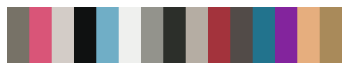

In [12]:
manycolor()